In [6]:
import pandas as pd
ds=pd.read_csv('../data/daily-bike-share.csv')
ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [9]:
nu_fe=['temp','atemp','hum','windspeed','rentals']
ds[nu_fe].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


<ipython-input-21-da884d9e2163>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


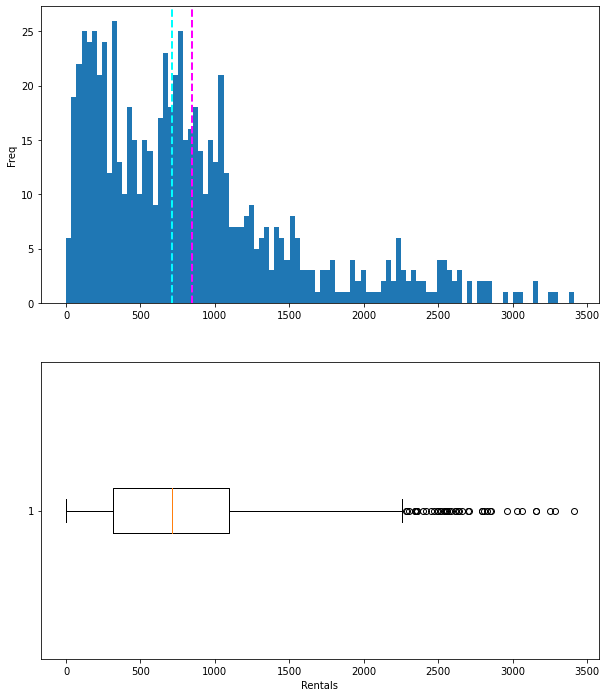

In [21]:
import matplotlib.pyplot as plt
label=ds.rentals
fig,ax=plt.subplots(2,1,figsize=(10,12))
ax[0].hist(label,bins=100)
ax[0].set_ylabel('Freq')
ax[0].axvline(label.mean(),color='magenta',linestyle='dashed',linewidth=2)
ax[0].axvline(label.median(),color='cyan',linestyle='dashed',linewidth=2)
ax[1].boxplot(label,vert=False)
ax[1].set_xlabel('Rentals')
fig.show()

In [24]:
X, y = ds[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, ds['rentals'].values

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)
print('Ts:%d;,rows Ts:%d'%(X_train.size,X_test.size))

Ts:5110;,rows Ts:2200


In [28]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=False).fit(X_train,y_train)
model

LinearRegression()

In [33]:
import numpy as np

predictions=model.predict(X_test)
np.set_printoptions(suppress=True)
print('Prediction Labels:', np.round(predictions)[:10])
print('Actual Labels:', y_test[:10])

Prediction Labels: [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual Labels: [2418  754  222   47  244  145  240  555 3252   38]


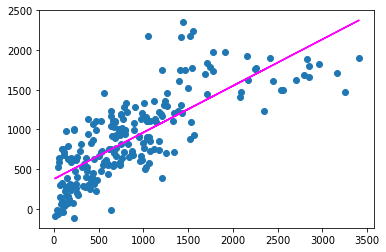

In [39]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.scatter(y_test,predictions)
z=np.polyfit(y_test,predictions,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='magenta')